In [117]:
from scipy.io.wavfile import *
import scipy.fftpack as fou
import numpy as np
import matplotlib.pyplot as plt

In [137]:
wav = read("beat.wav")

In [147]:
rate = wav[0]
sound = wav[1][700000:1050000]
F = fou.fft(sound)
freqs = fou.fftfreq(len(sound), 1./rate)

In [148]:
pikes= np.sort(np.abs(F))[::-1]

In [149]:
mask = np.invert(np.array([cosa in pikes[:10000] for cosa in np.abs(F)]))

In [150]:
F_filt = np.copy(F)
F_filt[mask] = 0

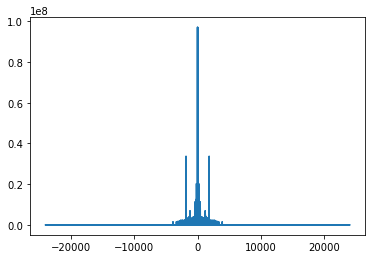

In [151]:
plt.plot(freqs, np.abs(F_filt))
#plt.xlim(10000,20000)
plt.show()

In [152]:
new_sound = np.abs(fou.ifft(F_filt)).astype('int16')

In [153]:
write("beat_1.wav", rate, new_sound)